# Visualize current state - plot COVID data

In [1]:
countryToAnalyze = "India"
stateToAnalyze ="Karnataka"

In [2]:
#Download data from "https://github.com/CSSEGISandData/COVID-19.git"

confirmedCsv = "COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recoveredCsv = "COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
deathsCsv = "COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

try:
    f = open(confirmedCsv)
except IOError:
    print('Download data from "https://github.com/CSSEGISandData/COVID-19.git"')
    assert False
finally:
    f.close()

In [3]:
import pandas as pd

confirmedDf = pd.read_csv(confirmedCsv)
recoveredDf = pd.read_csv(recoveredCsv)
deathsDf = pd.read_csv(deathsCsv)

In [4]:
#from pandas_profiling import ProfileReport

##profile = ProfileReport(confirmedDf, title='Confirmed - Pandas Profiling Report', html={'style':{'full_width':True}})
#profile = ProfileReport(confirmedDf)

#profile
##profile.to_widgets()
##profile.to_notebook_iframe()

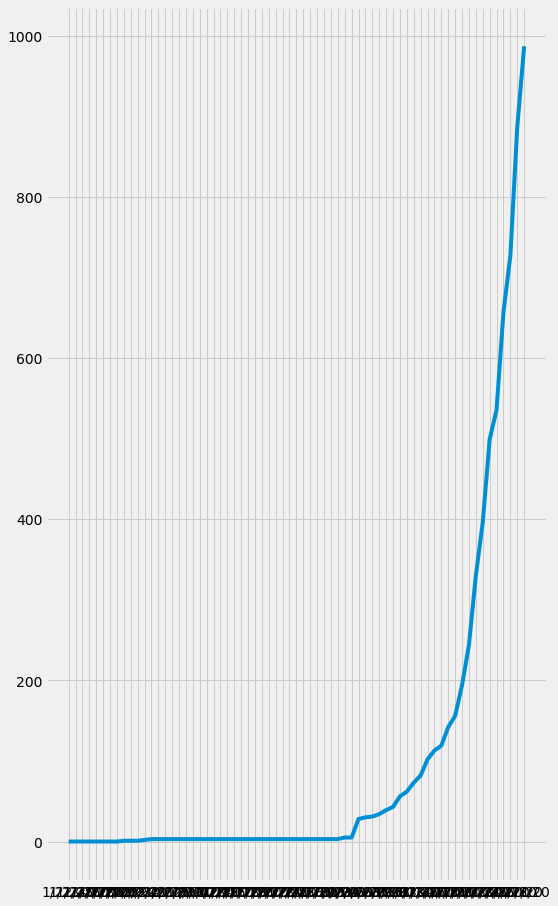

In [5]:
from matplotlib import pyplot
%matplotlib inline

pyplot.style.use("fivethirtyeight")# for pretty graphs

# Increase the default plot size and set the color scheme
pyplot.rcParams['figure.figsize'] = 8, 15

confirmedTSDf = confirmedDf.loc[confirmedDf["Country/Region"] == countryToAnalyze].T[4:]
pyplot.figure(1)
pyplot.plot(confirmedTSDf)

[0 0 0 0 0 0 0 0 1 1 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 5 5 28 30 31 34 39 43 56 62 73 82 102 113 119 142 156 194 244 330
 396 499 536 657 727 887 987]
[0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 23 2 1 3 5 4 13 6 11 9 20 11 6 23 14 38 50 86 66 103 37 121 70
 160 100]


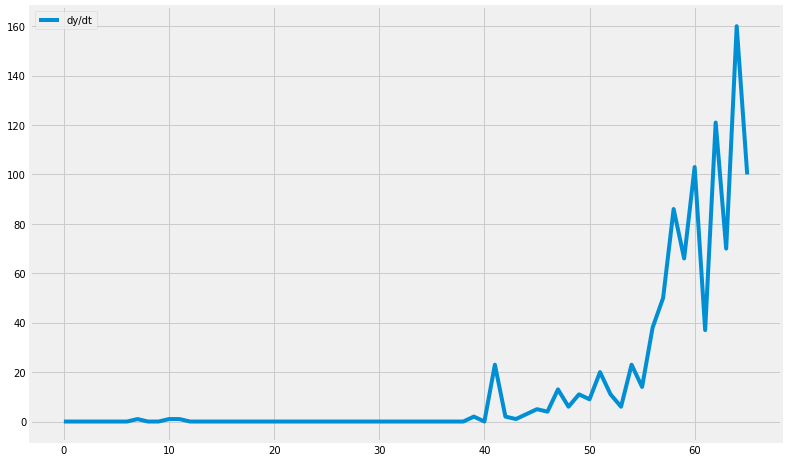

In [6]:
%matplotlib inline
import numpy as np
print(confirmedTSDf.values.flatten())
dy_dt= np.diff(confirmedTSDf.values.flatten())
print(dy_dt)
f, ax = pyplot.subplots(figsize=(12, 8))
pyplot.plot(dy_dt, label="dy/dt")
pyplot.legend()

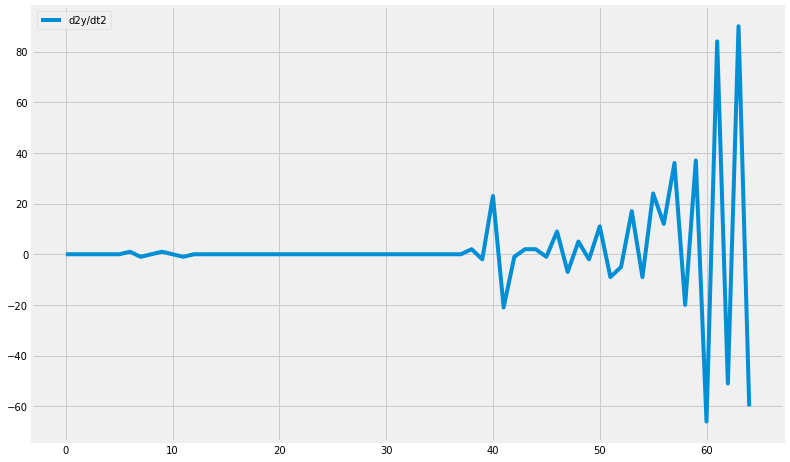

In [7]:
d2y_dt2= np.diff(dy_dt)
f, ax = pyplot.subplots(figsize=(12, 8))
pyplot.plot(d2y_dt2, label="d2y/dt2")
pyplot.legend()

## Compute SEIR parametes - alpha, beta, gamma

India
Pakistan


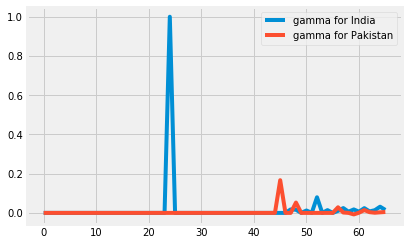

In [8]:
countries = list([countryToAnalyze, "Pakistan"])
pyplot.figure(1)

#This is incomplete - WIP
for country in countries:
    print(country)
    confirmedTSDf = confirmedDf.loc[confirmedDf["Country/Region"] == country].T[4:]
    recoveredTSDf = recoveredDf.loc[recoveredDf["Country/Region"] == country].T[4:]
    deathsTSDf = deathsDf.loc[deathsDf["Country/Region"] == country].T[4:]
    removedArr = recoveredTSDf.values + deathsTSDf.values
    dR_dt= np.diff(removedArr.flatten())
    confirmedArr = confirmedTSDf[1:].values.flatten()
    confirmedArr[confirmedArr == 0] = 0.0001 # to prevent divide by zero
    gamma = dR_dt / confirmedArr
    #print(confirmedTSDf)
    #print(recoveredTSDf)
    #print(removedArr)
    #print("dr_dt",dR_dt)
    #print(gamma)
    pyplot.plot(gamma, label="gamma for "+country)
    
pyplot.legend()

# Analyze statewise for India 

Download data from - https://www.kaggle.com/sudalairajkumar/covid19-in-india


In [9]:
from datetime import datetime

covidDataFile = "covid19-in-india/covid_19_india.csv"
populationFile = "covid19-in-india/population_india_census2011.csv"
hospitalBedsFile = "covid19-in-india/HospitalBedsIndia.csv"
icmrTestingFile = "covid19-in-india/ICMRTestingDetails.csv"

try:
    f = open(covidDataFile)
except IOError:
    print('Download data from "https://www.kaggle.com/sudalairajkumar/covid19-in-india"')
    assert False
finally:
    f.close()
    
    
def parser(x):
    return datetime.strptime(x, '%d/%m/%y')

def icmrDateParser(x):
    return datetime.strptime(x, '%d/%m/%y %H:%M')

covidIndiaDataDf = pd.read_csv(covidDataFile, parse_dates=[1], index_col=1, squeeze=True, date_parser=parser)
populationDf = pd.read_csv(populationFile)
hospitalBedsDf = pd.read_csv(hospitalBedsFile)
icmrTestingDf = pd.read_csv(icmrTestingFile, parse_dates=[1], date_parser=icmrDateParser)

## Capacity for maximum

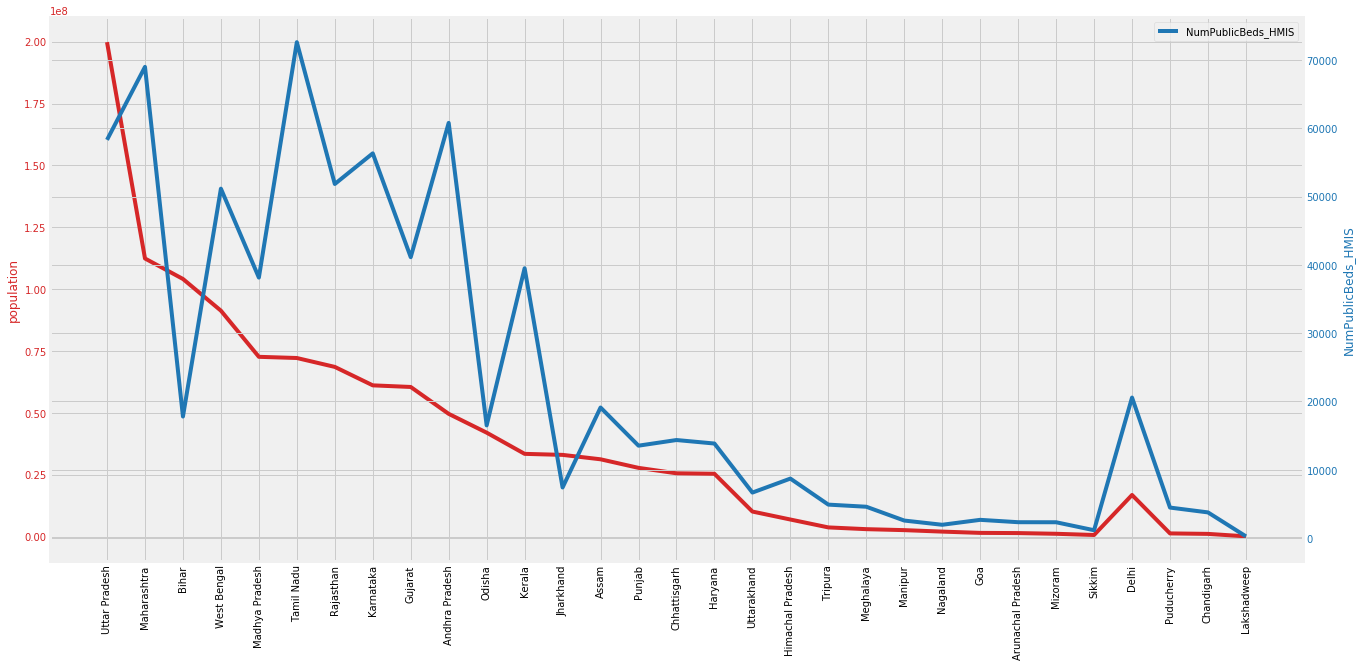

In [10]:
%matplotlib inline


hospitalBedsDf.dropna(axis=0, how='all', inplace=True)
hospitalBedsDf = hospitalBedsDf.fillna(-1)
hospitalBedsDf = hospitalBedsDf.loc[hospitalBedsDf["State/UT"] != "All India"]
hospitalBedsDf["State / Union Territory"] = hospitalBedsDf["State/UT"]

populationHospitalBedsdf = pd.merge(populationDf, hospitalBedsDf, on=['State / Union Territory'])
states = populationHospitalBedsdf["State / Union Territory"]

fig, ax1 = pyplot.subplots(figsize=(20,10))

color = 'tab:red'
ax1.set_ylabel('population', color=color)
pyplot.xticks(rotation=90)
ax1.plot(states, populationHospitalBedsdf["Population"], label ="population", color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = ax1.twinx()
ax2.set_ylabel('NumPublicBeds_HMIS', color=color)

ax2.plot(states, populationHospitalBedsdf["NumPublicBeds_HMIS"].astype(int), label="NumPublicBeds_HMIS", color=color)
ax2.tick_params(axis='y', labelcolor=color)
pyplot.legend()

## State-wise numbers

In [11]:
covidIndiaLastDayDataDf = pd.DataFrame(columns=covidIndiaDataDf.columns.values)

covidIndiaLastDayDataDf.insert(len(covidIndiaDataDf.columns), "dy_dt", [], True)
covidIndiaLastDayDataDf.insert(len(covidIndiaDataDf.columns), "d2y_dt2", [], True)
covidIndiaLastDayDataDf.insert(len(covidIndiaDataDf.columns), "days", [], True)


for state in states:
    stateDataDf = covidIndiaDataDf.loc[covidIndiaDataDf["State/UnionTerritory"] ==state]
    stateDataDf.sort_values('Date',ascending=False,inplace=True)
    if stateDataDf.shape[0] != 0:
        covidIndiaLastDayDataDf = covidIndiaLastDayDataDf.append(stateDataDf.iloc[0])
        dy_dt= np.diff(stateDataDf["ConfirmedIndianNational"].values)
        d2y_dt2= np.diff(dy_dt)
        days = 0
        if len(stateDataDf.index) > 0:
            date = stateDataDf.index[-1]
            days = (stateDataDf.index[0] - stateDataDf.index[-1]).days
            #print(days)
        else:
            date=datetime.strptime("1/1/1970", '%d/%m/%y')
        if date == 0:
            date=datetime.strptime("1/1/1970", '%d/%m/%y')
        last_dy_dt = 0
        if dy_dt.shape[0] != 0:
            last_dy_dt = dy_dt[0]
        last_d2y_dt2 = 0
        if d2y_dt2.shape[0] != 0:
            last_d2y_dt2 = d2y_dt2[0]
        covidIndiaLastDayDataDf.iloc[-1,-1] = -1*last_dy_dt
        covidIndiaLastDayDataDf.iloc[-1, -2] = -1*last_d2y_dt2
        covidIndiaLastDayDataDf.iloc[-1, -3] = days
    else:
        covidIndiaLastDayDataDf = covidIndiaLastDayDataDf.append(pd.Series(), ignore_index=True)
        covidIndiaLastDayDataDf.iloc[-1, 1] = state
    

covidIndiaLastDayDataDf.fillna(0, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


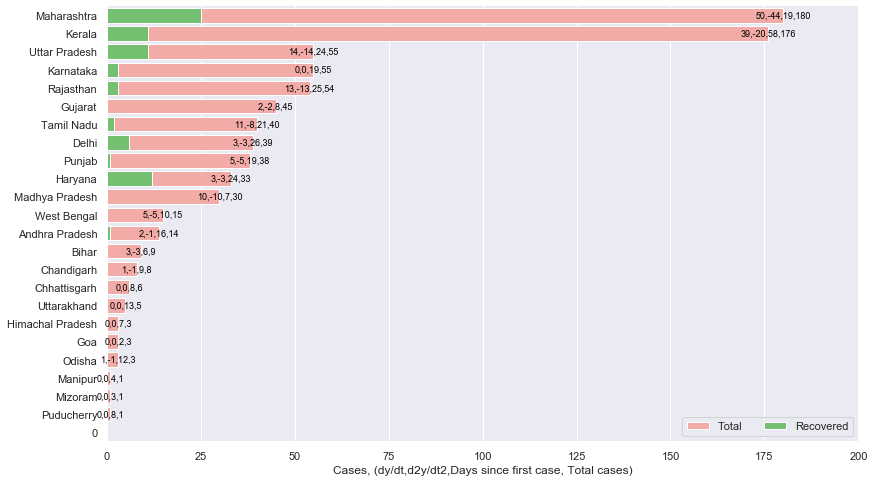

In [12]:
import seaborn as sns

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

f, ax = pyplot.subplots(figsize=(12, 8))
covidIndiaLastDayDataDf['Name of State / UT']=covidIndiaLastDayDataDf['State/UnionTerritory']
covidIndiaLastDayDataDf['Total cases']=covidIndiaLastDayDataDf['ConfirmedIndianNational']+covidIndiaLastDayDataDf['ConfirmedForeignNational']
covidIndiaLastDayDataDf['Cured/Discharged/Migrated']=covidIndiaLastDayDataDf['Cured']
data = covidIndiaLastDayDataDf[['Name of State / UT','Total cases','Cured/Discharged/Migrated','Deaths', 'dy_dt', 'd2y_dt2', 'days']]

data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,
            label="Total", color="r", ci=None)

sns.set_color_codes("muted")
g =sns.barplot(x="Cured/Discharged/Migrated", y="Name of State / UT", data=data,
            label="Recovered", color="g", ci=None)


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 200), ylabel="",
       xlabel="Cases, (dy/dt,d2y/dt2,Days since first case, Total cases)")
sns.despine(left=True, bottom=True)


order = 0
for index, row in data.iterrows():
    val = str(int(row['dy_dt'])) + "," + str(int(row['d2y_dt2'])) + "," + str(int(row['days'])) + ","+str(row["Total cases"])
    if val != "0,0,0,0":
        g.text(row["Total cases"], order, val, color='black', ha="center", fontsize=9, horizontalalignment='left',  verticalalignment='center')
    order += 1
    

## Testing to positive - trend and ratio

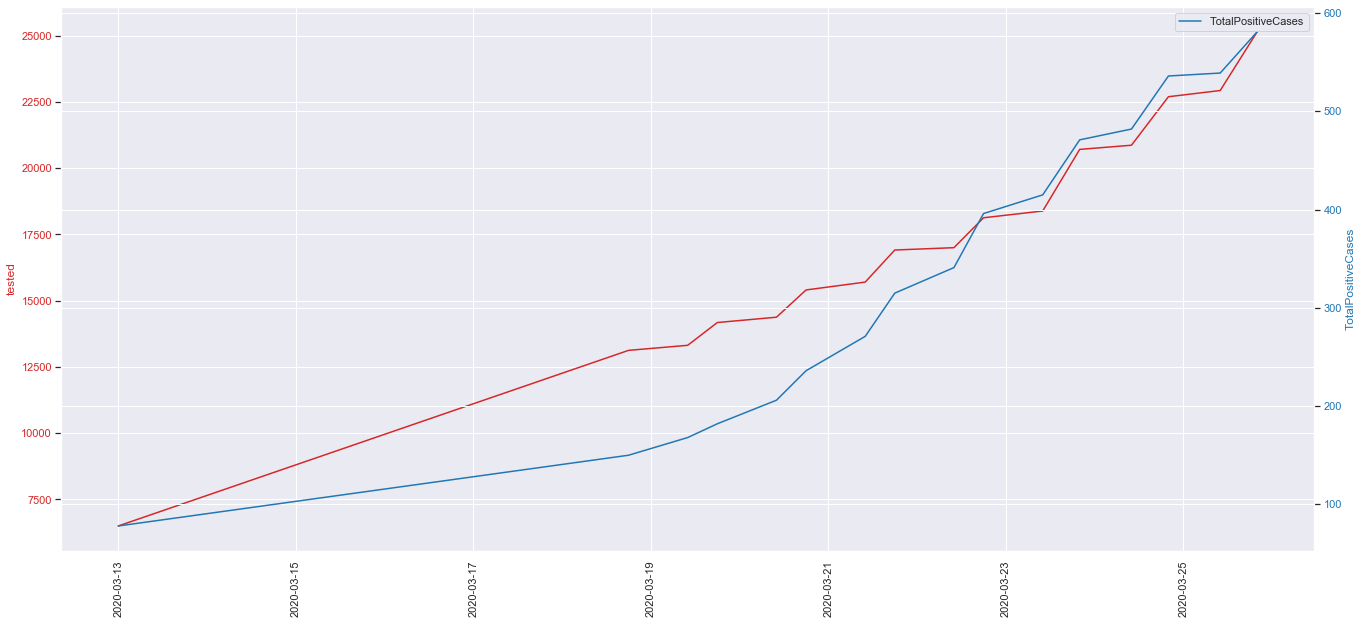

In [13]:
fig, ax1 = pyplot.subplots(figsize=(20,10))

color = 'tab:red'
ax1.set_ylabel('tested', color=color)
pyplot.xticks(rotation=90)
ax1.plot(icmrTestingDf["DateTime"], icmrTestingDf["TotalSamplesTested"], label ="TotalSamplesTested", color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = ax1.twinx()
ax2.set_ylabel('TotalPositiveCases', color=color)

ax2.plot(icmrTestingDf["DateTime"], icmrTestingDf["TotalPositiveCases"], label="TotalPositiveCases", color=color)
ax2.tick_params(axis='y', labelcolor=color)
pyplot.legend()


# Giving an Index to states based on their handling - where to focus?

Lower the better

In [14]:
#Penalty for delay since first case
data["responseIndex"] = (0.001+data["days"])
#Penalty for rate of growth of cases
data["responseIndex"] = data["responseIndex"] + data["responseIndex"] * 1000*(0.001+data["dy_dt"])
#Penalty if the rate of rate itself is up
data["responseIndex"] = data["responseIndex"] + data["responseIndex"] * 1000*(0.001+data["d2y_dt2"])

data["responseIndex"] = data["responseIndex"] + data["responseIndex"] *100*(0.001+data["Total cases"])/(data["Total cases"].sum())

data.sort_values('responseIndex',ascending=False,inplace=True)
data.reset_index()
indexData = data[['Name of State / UT', 'responseIndex']]
indexData.drop(index=0, inplace=True)
display(indexData)

,Name of State / UT,responseIndex
7,Karnataka,5.895539e+02
17,Uttarakhand,8.395388e+01
15,Chhattisgarh,5.559810e+01
18,Himachal Pradesh,3.832832e+01
28,Puducherry,3.593963e+01
21,Manipur,1.797206e+01
25,Mizoram,1.348017e+01
23,Goa,1.095486e+01
12,0,4.000491e-03
26,0,4.000491e-03


# Analyze a particular State

In [15]:
covidStateDataDf = covidIndiaDataDf.loc[covidIndiaDataDf["State/UnionTerritory"]==stateToAnalyze]

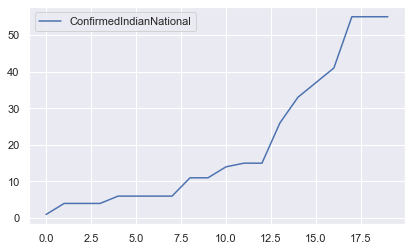

In [16]:
%matplotlib inline
pyplot.figure(1)
pyplot.plot(covidStateDataDf["ConfirmedIndianNational"].values, label="ConfirmedIndianNational")
pyplot.legend()

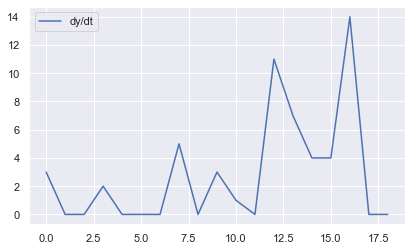

In [17]:
dy_dt= np.diff(covidStateDataDf["ConfirmedIndianNational"].values)
pyplot.figure(1)
pyplot.plot(dy_dt, label="dy/dt")
pyplot.legend()

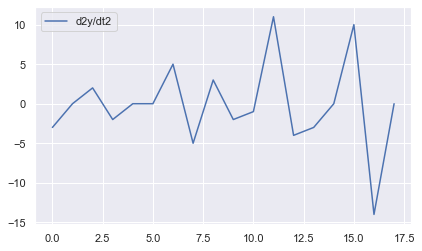

In [18]:
d2y_dt2= np.diff(dy_dt)
pyplot.figure(1)
pyplot.plot(d2y_dt2, label="d2y/dt2")
pyplot.legend()

In [19]:
usDataCsv = "us-counties.csv"
# Data can be downloaded from : https://www.kaggle.com/fireballbyedimyrnmom/us-counties-covid-19-dataset
usDf = pd.read_csv(usDataCsv) 
usDf_group_by_date = usDf.groupby('date').sum()
print(usDf_group_by_date)
total_infected_us_timeseries = usDf_group_by_date['cases']
total_removed_us_timeseries = usDf_group_by_date['deaths']

                  fips   cases  deaths
date                                  
2020-01-21     53061.0       1       0
2020-01-22     53061.0       1       0
2020-01-23     53061.0       1       0
2020-01-24     70092.0       2       0
2020-01-25     76151.0       3       0
...                ...     ...     ...
2020-03-26  48514017.0   85615    1279
2020-03-27  52188877.0  102913    1652
2020-03-28  55596535.0  123831    2139
2020-03-29  58400988.0  142178    2413
2020-03-30  61218258.0  163676    2909

[70 rows x 3 columns]


[    0   322   400   650   888  1128  1694  2036  2502  3089  3858  4636
  5883  7375  9172 10149 12462 15113 17660 21157 24747 27980 31506 35713
 41035 47021 53578 59138 63927 69176 74386 80539 86498 92472]


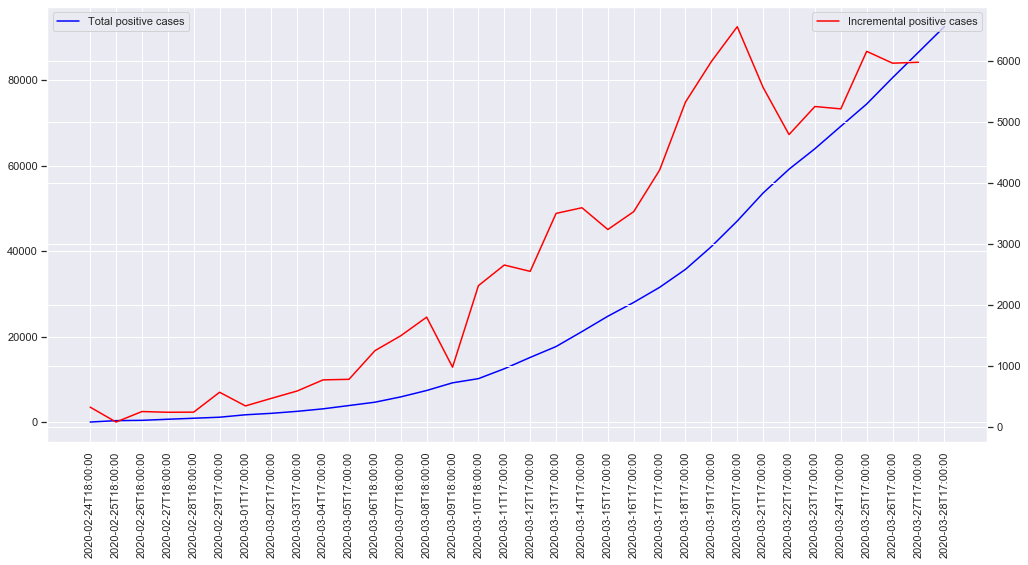

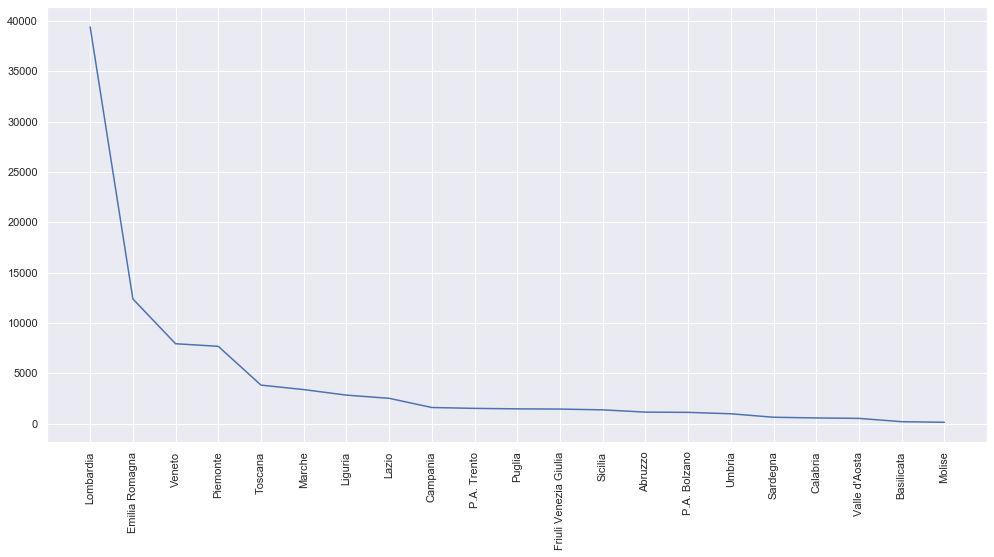

Percentage of time series


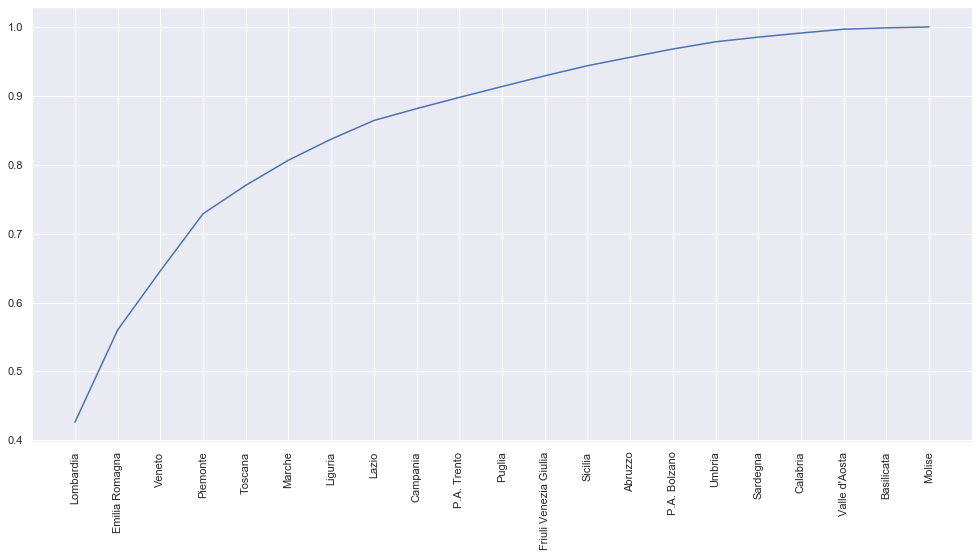

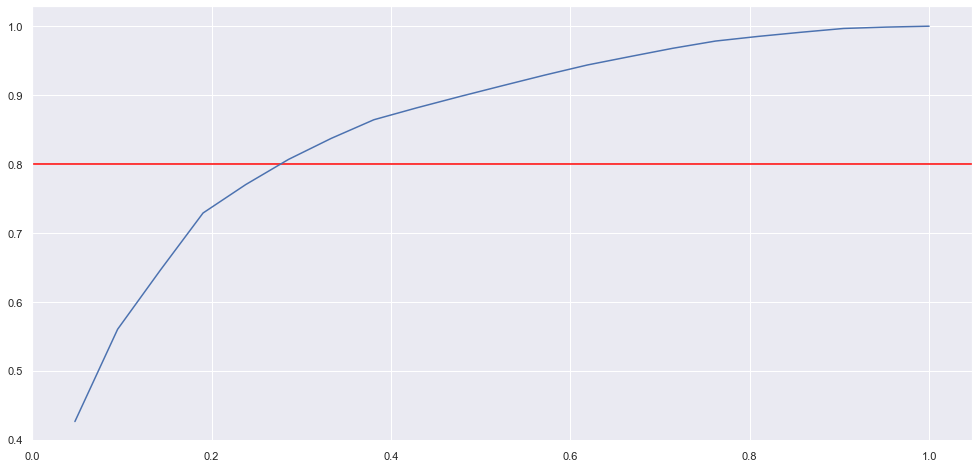

In [20]:
provinceCsv = "covid19-in-italy/covid19_italy_province.csv"
regionCsv = "covid19-in-italy/covid19_italy_region.csv"

populationOfCountries = "population_by_country_2020.csv"
# N = 60000000
try:
    f = open(confirmedCsv)
except IOError:
    print('Download data from "https://www.kaggle.com/sudalairajkumar/covid19-in-italy"')
    assert False
finally:
    f.close()
    
import pandas as pd

provinceDf = pd.read_csv(provinceCsv)
regionDf = pd.read_csv(regionCsv)   
populationDf = pd.read_csv(populationOfCountries)

from matplotlib import pyplot
import numpy as np
from mlxtend.plotting import ecdf
from scipy import stats
%matplotlib inline

provinceDf_group_by_date = provinceDf.groupby('Date').sum()
regionDf_group_by_date = regionDf.groupby('Date').sum()

total_positive_cases_timeseries = provinceDf_group_by_date['TotalPositiveCases']
total_removed_cases_timeseries = regionDf_group_by_date['Recovered']+regionDf_group_by_date['Deaths']

print(total_positive_cases_timeseries.values.flatten())
incremental_positive_cases_timeseries = np.diff(total_positive_cases_timeseries.values.flatten())
pyplot.figure(figsize=(15, 8))
pyplot.xticks(rotation=90)
ax = pyplot.axes()
ax_bis = ax.twinx()
ax.plot(total_positive_cases_timeseries, label='Total positive cases', color='blue')
ax_bis.plot(incremental_positive_cases_timeseries, label='Incremental positive cases', color= 'red')
ax.legend(loc=2)
ax_bis.legend(loc=1)   
pyplot.show()


date_ = '2020-03-28T17:00:00'
df_last_date = provinceDf[provinceDf['Date']==date_]
df_last_date = df_last_date.groupby('RegionName').sum()

# df_last_date = df_last_date.sortby('TotalPositiveCases')
df_timeseries = df_last_date['TotalPositiveCases']
df_timeseries = df_timeseries.sort_values(ascending=False)
pyplot.figure(figsize=(15, 8))
pyplot.xticks(rotation=90)
pyplot.plot(df_timeseries)
pyplot.show()


df_timeseries = df_timeseries/df_timeseries.sum()
print('Percentage of time series')
pyplot.show()

out_sum = np.cumsum(df_timeseries)
pyplot.figure(figsize=(15, 8))
pyplot.xticks(rotation=90)
pyplot.plot(out_sum)
pyplot.show()


len_reg=len(df_last_date)
x= np.arange(len_reg)
x=x+1
x = x/x.max()
# pyplot.scatter(0.2, 0.8, s=100, color='red')
pyplot.figure(figsize=(15, 8))
pyplot.axhline(y=0.8,  color='red')
# TODO : compute value of x for which y=0.8 and show
pyplot.plot(x, out_sum)
pyplot.show()



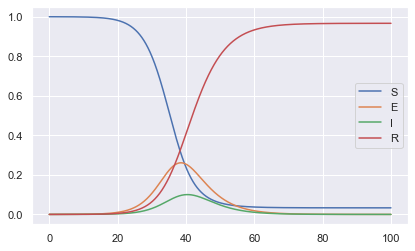

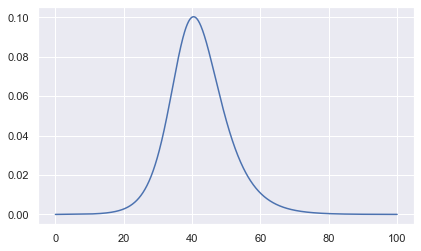

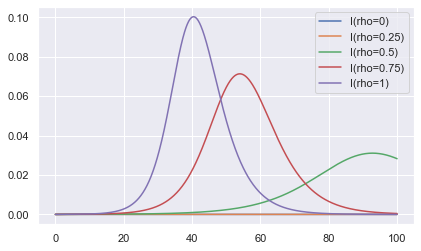

In [21]:
%run ./SEIR-with-Social-Distancing.ipynb
def predictValues(alpha, beta, gamma, nSteps, N):
    init_vals = 1 - 1/N, 1/N, 0, 0
    params = alpha, beta, gamma
    dt = .1
    t = np.linspace(0, nSteps, int(nSteps/dt) + 1)
#     print('Init values are:: ', init_vals)
#     print('Number of steps are :: ', nSteps)
    results = base_seir_model(init_vals, params, t)
    return results

In [22]:
def computeGamma(infected, removed):    
    dR_dt= np.diff(removed)
#     infectedTS = infected.values.flatten()
    confirmedArr[confirmedArr == 0] = 0.0001 # to prevent divide by zero
    gamma = dR_dt / infected[1:]
    pyplot.plot(gamma, label='gamma')
    pyplot.title('computeGamma')
    pyplot.xticks(rotation=90)
    pyplot.legend()
    pyplot.show()  
    return gamma.mean()

In [23]:
def computeLoss(yhat, infected, removed):
    offsetOfyHat = 0
    offsetOfinfected = 0
    if(len(infected)>len(yhat[2, :])):
        offsetOfinfected = len(infected)-len(yhat[2, :])
    else:
        offsetOfyHat = len(yhat[2, :])-len(infected)
    loss= infected[offsetOfinfected:] - yhat[2,offsetOfyHat:]
    l1 = (loss*loss).sum()
    
    loss= (removed[offsetOfinfected:] - yhat[3,offsetOfyHat:])
    l2 = (loss*loss).sum()
    
    weightForRecovered = 0.1
    return weightForRecovered * l1 + (1 - weightForRecovered) * l2


In [24]:
import numpy as np
def estimateParameters(infected, removed, N):
    minLoss = -1
    minParams=[]
    lossHistory=[]
    alphaHistory=[]
    betaHistory=[]
    gammaHistory=[]
    minYhat = None
   
    alphaSpace = np.arange(0.4,1,0.05)
    betaSpace = np.arange(0.4,1,0.05)
    gammaSpace = np.arange(0,1,0.05)
    for index in range(len(infected)):
        if(infected[index]!=0):
            break
    infected = infected[index : ]
    removed = removed[index : ]
    nSteps = len(infected)/10
    gamma = computeGamma(infected, removed)
    for alpha in alphaSpace:
        for beta in betaSpace:
#             for gamma in gammaSpace:
            
            yhat = (predictValues(alpha, beta, gamma, nSteps, N)*N)
            loss = computeLoss(yhat, infected, removed)
            if(loss < minLoss) or (minLoss == -1):
                minLoss = loss
                minParams = [alpha, beta, gamma]
                minYhat = yhat
            lossHistory.append(loss)
            alphaHistory.append(alpha)
            betaHistory.append(beta)
            gammaHistory.append(gamma)
    pyplot.plot(alphaHistory, label='alpha')
    pyplot.plot(betaHistory, label='beta')
    pyplot.plot(gammaHistory, label='gamma')
    pyplot.title('paramsHistory')
    pyplot.legend()
    pyplot.show()            
    pyplot.plot(lossHistory)
    pyplot.title('lossHistory')
    pyplot.legend()
    pyplot.show()
    pyplot.plot(minYhat[2,1:])
    pyplot.title('minYhat[2,1:]')
    pyplot.legend()
    pyplot.show()
    pyplot.plot(infected)
    pyplot.title('infected')
    pyplot.legend()
    pyplot.show()
    pyplot.plot(minYhat[3,1:])
    pyplot.title('minYhat[3,1:]')
    pyplot.legend()
    pyplot.show()
    pyplot.plot(removed)
    pyplot.title('removed')
    pyplot.legend()
    pyplot.show()
#     Find index of minimum loss and return params for param history from that index
    return minParams

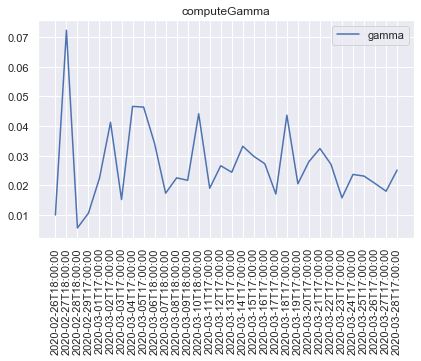

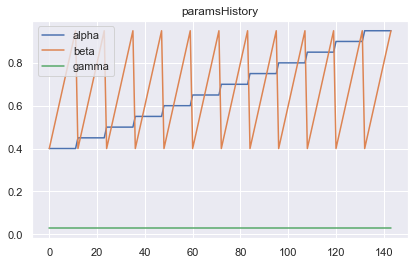

No handles with labels found to put in legend.


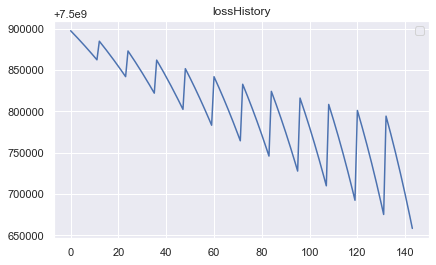

No handles with labels found to put in legend.


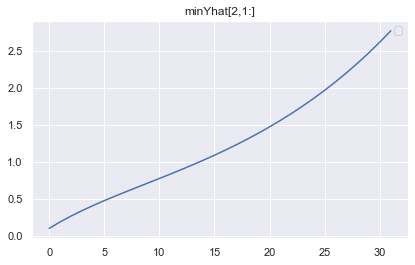

No handles with labels found to put in legend.


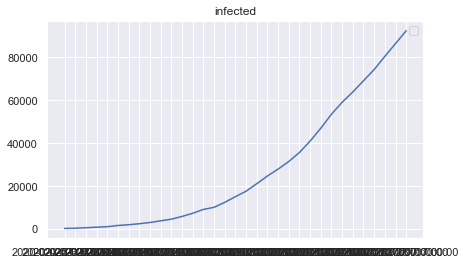

No handles with labels found to put in legend.


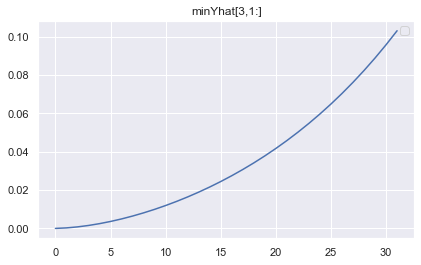

No handles with labels found to put in legend.


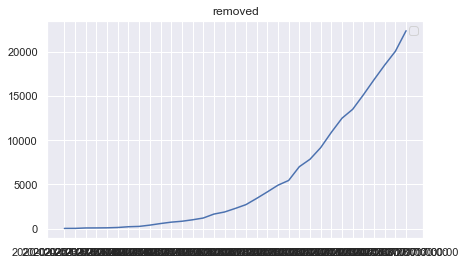

[0.9499999999999998, 0.9499999999999998, 0.02704732590649175]


In [25]:
params = estimateParameters(total_positive_cases_timeseries, total_removed_cases_timeseries, N)
print(params)

India


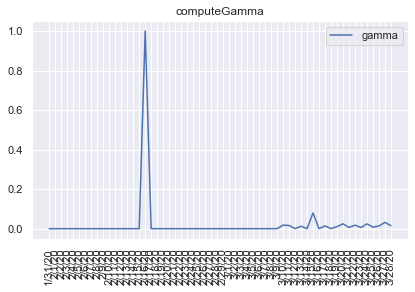

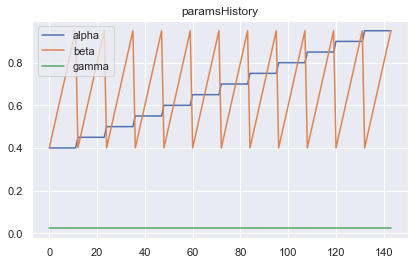

No handles with labels found to put in legend.


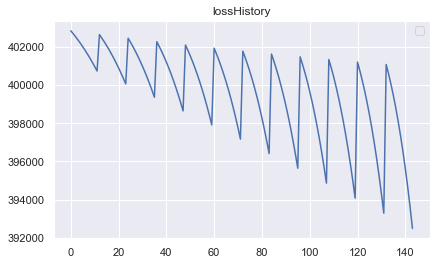

No handles with labels found to put in legend.


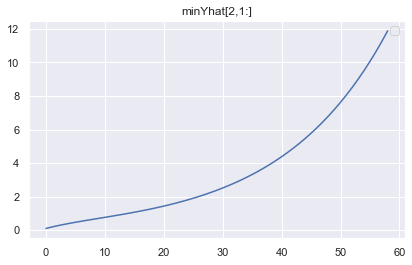

No handles with labels found to put in legend.


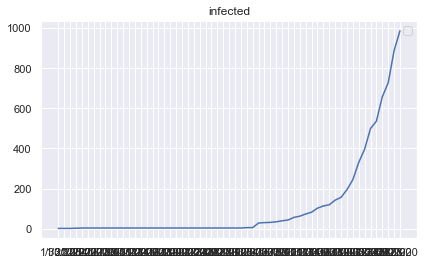

No handles with labels found to put in legend.


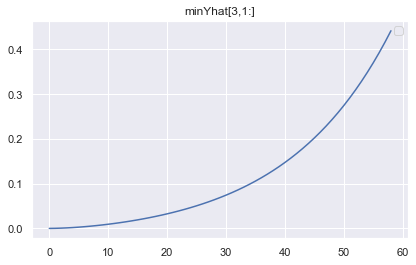

No handles with labels found to put in legend.


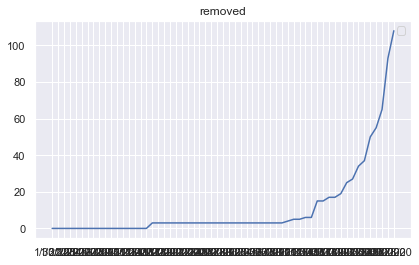

Pakistan


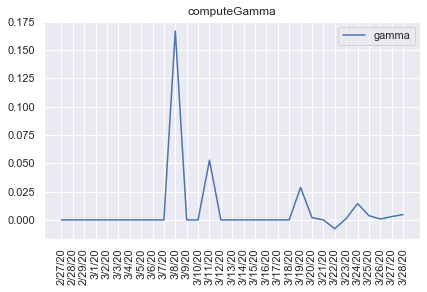

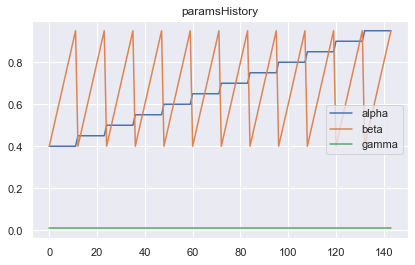

No handles with labels found to put in legend.


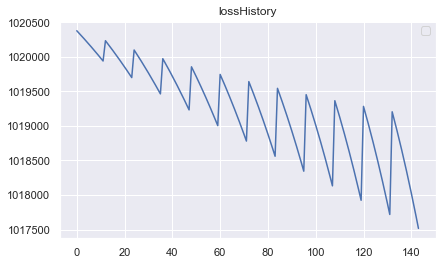

No handles with labels found to put in legend.


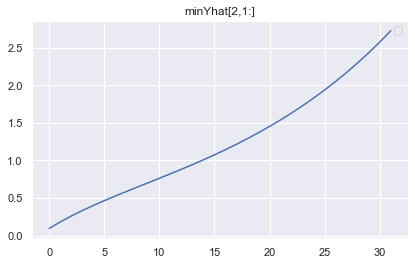

No handles with labels found to put in legend.


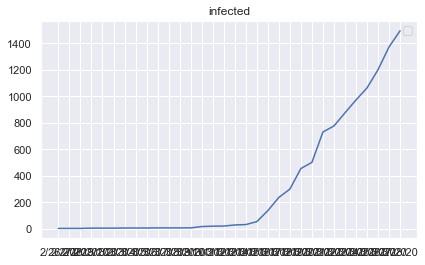

No handles with labels found to put in legend.


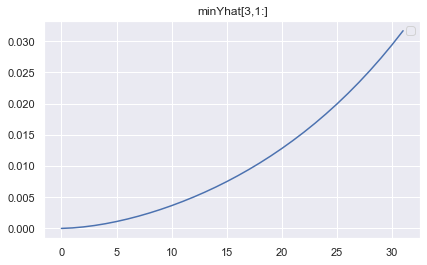

No handles with labels found to put in legend.


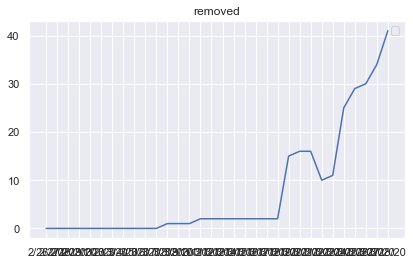

Italy


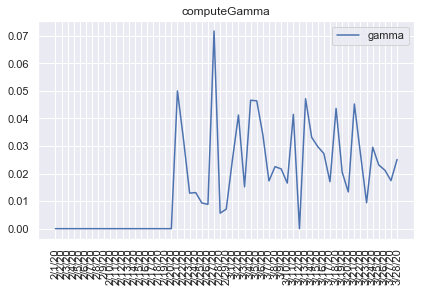

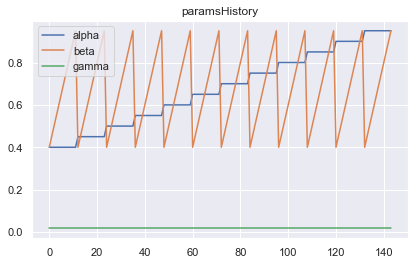

No handles with labels found to put in legend.


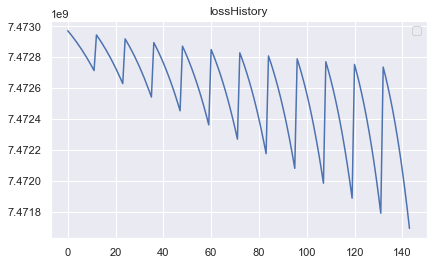

No handles with labels found to put in legend.


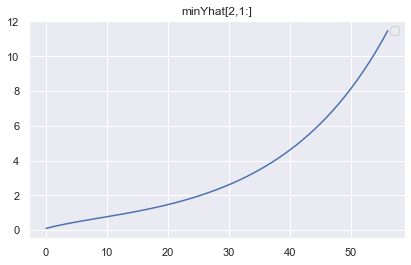

No handles with labels found to put in legend.


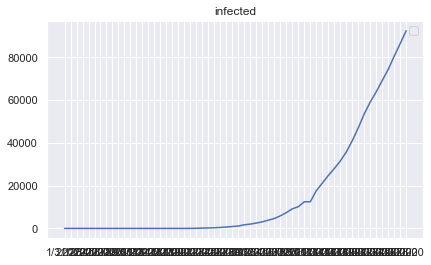

No handles with labels found to put in legend.


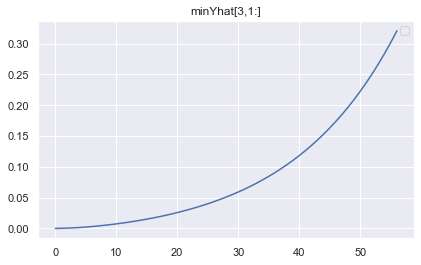

No handles with labels found to put in legend.


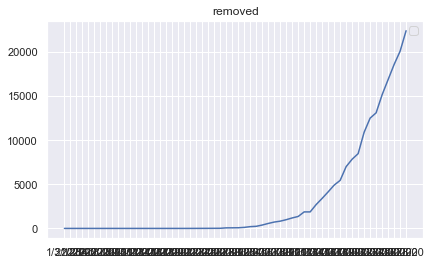

Spain


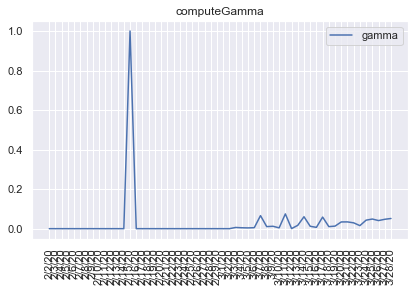

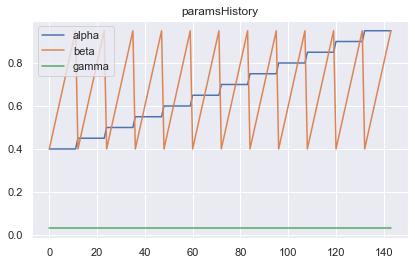

No handles with labels found to put in legend.


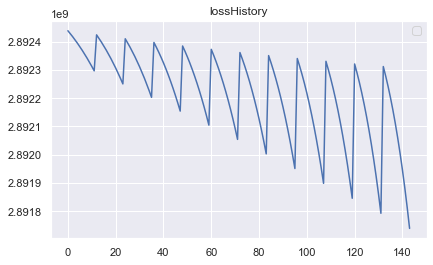

No handles with labels found to put in legend.


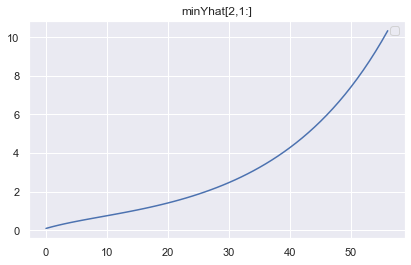

No handles with labels found to put in legend.


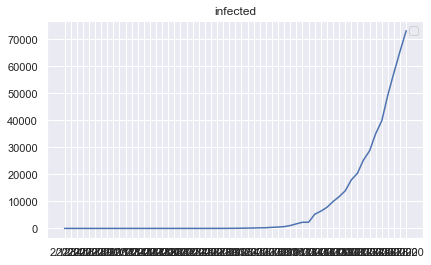

No handles with labels found to put in legend.


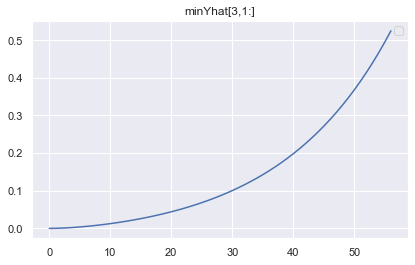

No handles with labels found to put in legend.


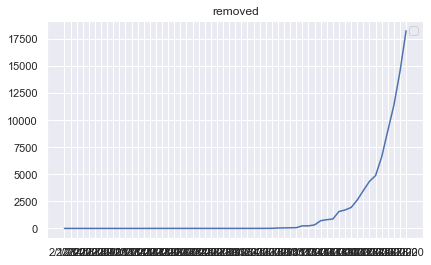

France


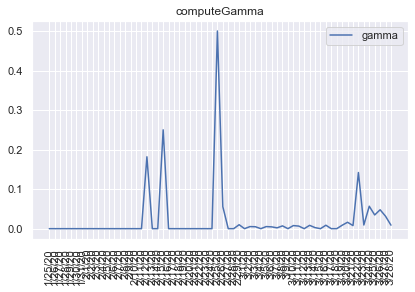

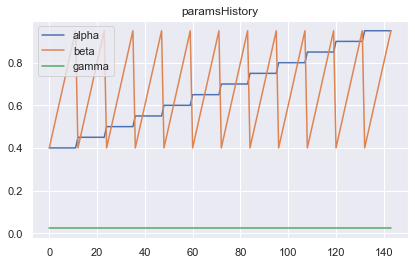

No handles with labels found to put in legend.


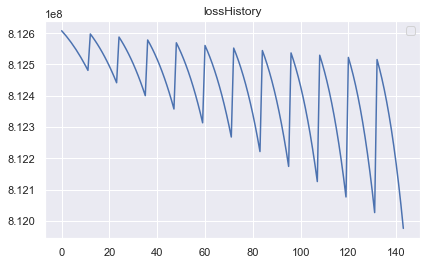

No handles with labels found to put in legend.


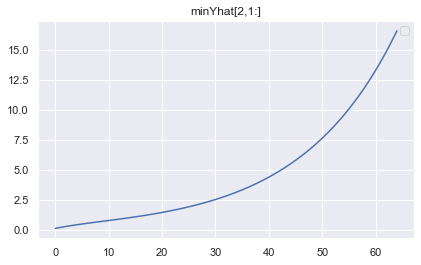

No handles with labels found to put in legend.


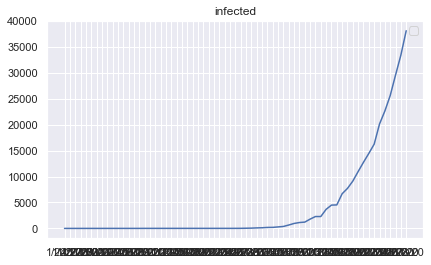

No handles with labels found to put in legend.


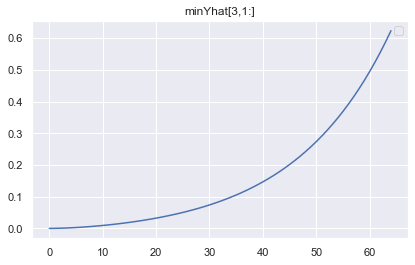

No handles with labels found to put in legend.


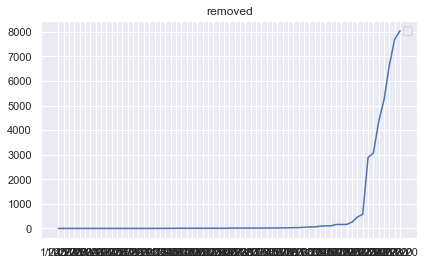

Iran


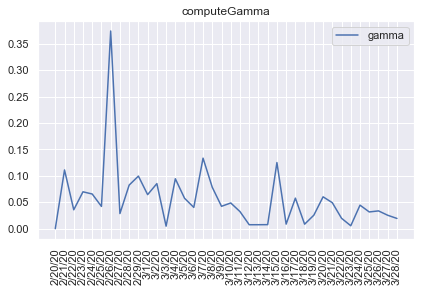

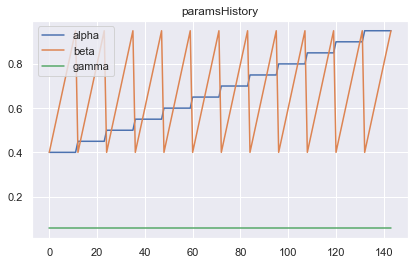

No handles with labels found to put in legend.


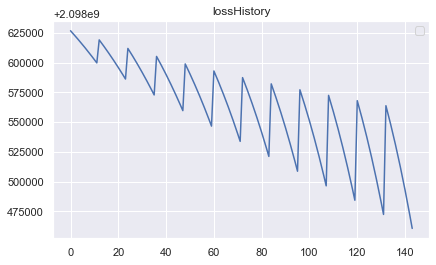

No handles with labels found to put in legend.


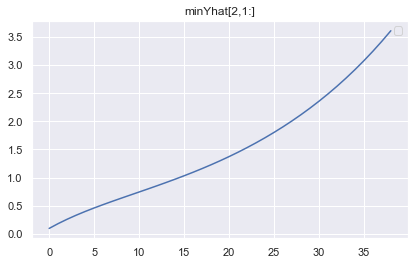

No handles with labels found to put in legend.


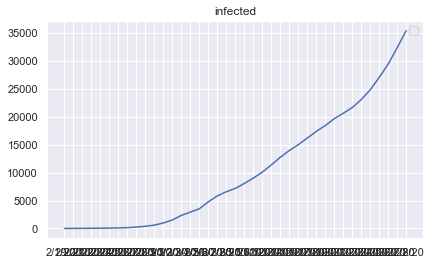

No handles with labels found to put in legend.


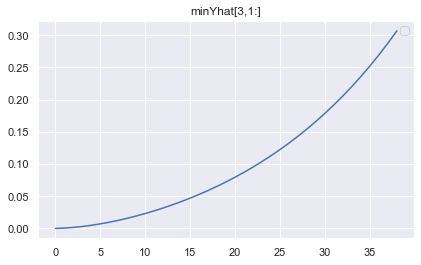

No handles with labels found to put in legend.


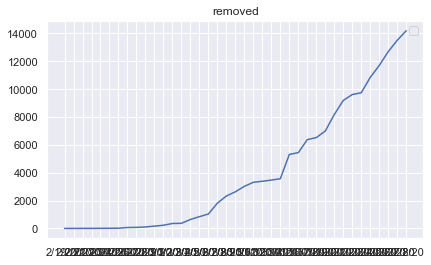

China


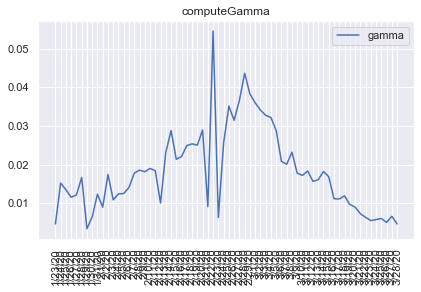

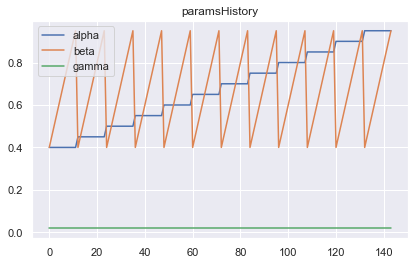

No handles with labels found to put in legend.


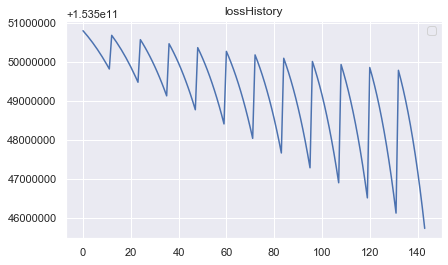

No handles with labels found to put in legend.


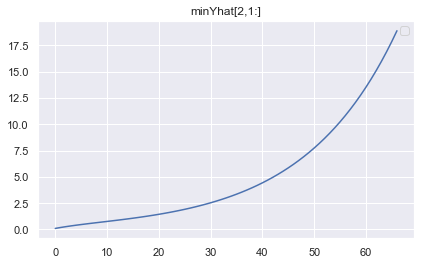

No handles with labels found to put in legend.


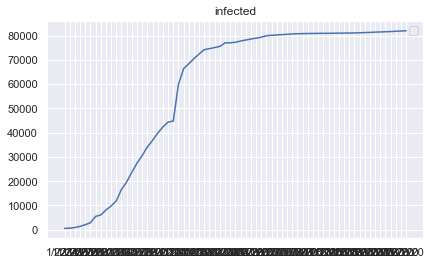

No handles with labels found to put in legend.


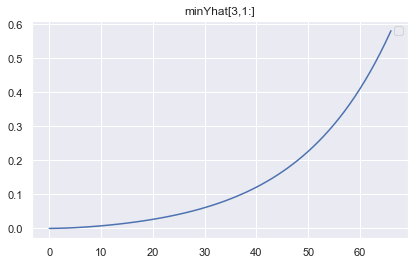

No handles with labels found to put in legend.


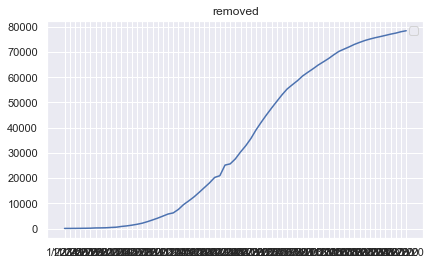

Germany


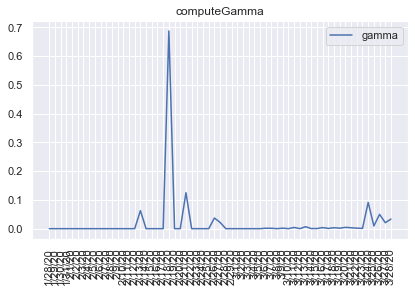

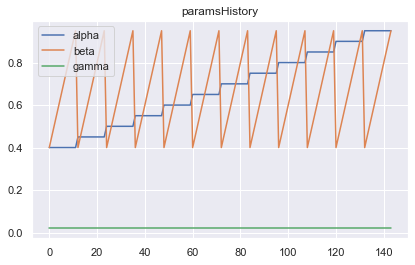

No handles with labels found to put in legend.


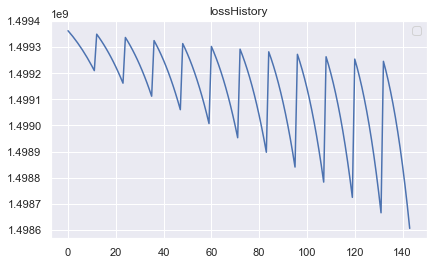

No handles with labels found to put in legend.


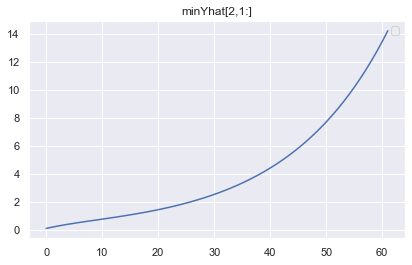

No handles with labels found to put in legend.


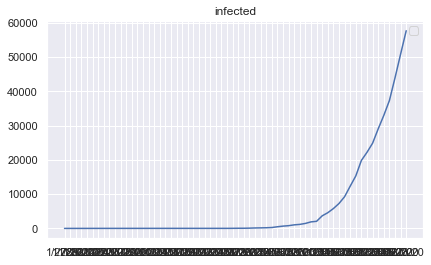

No handles with labels found to put in legend.


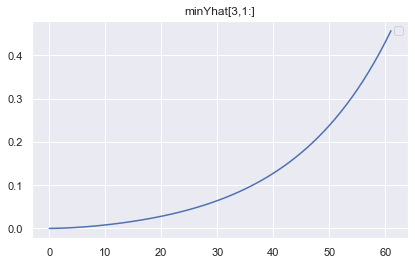

No handles with labels found to put in legend.


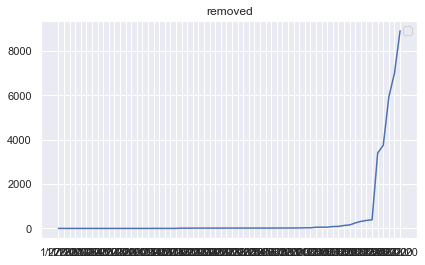

United Kingdom


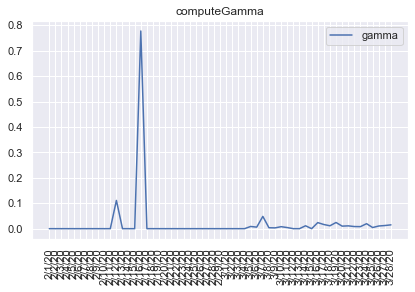

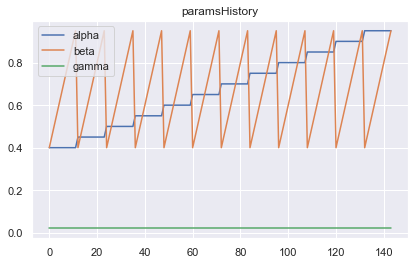

No handles with labels found to put in legend.


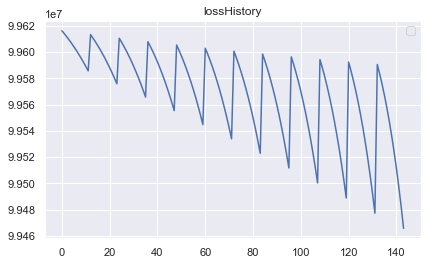

No handles with labels found to put in legend.


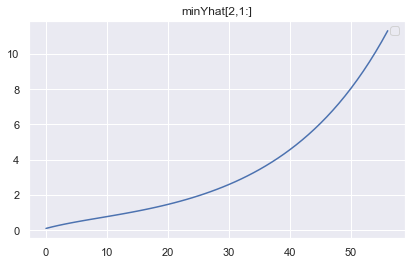

No handles with labels found to put in legend.


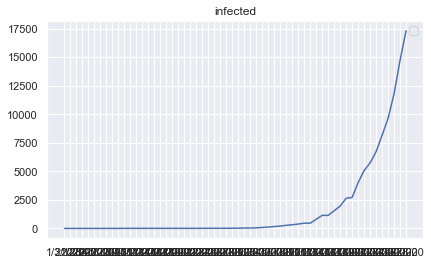

No handles with labels found to put in legend.


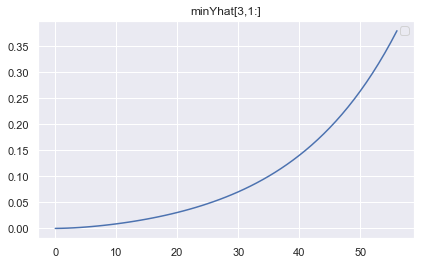

No handles with labels found to put in legend.


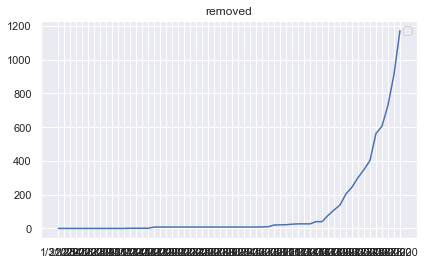

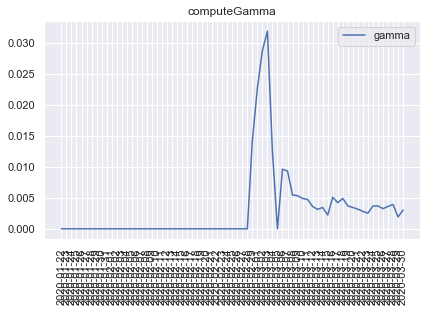

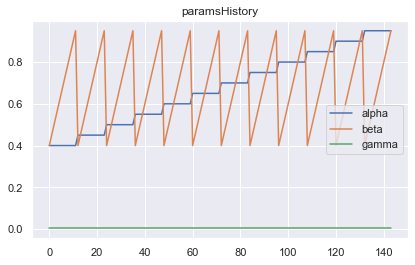

No handles with labels found to put in legend.


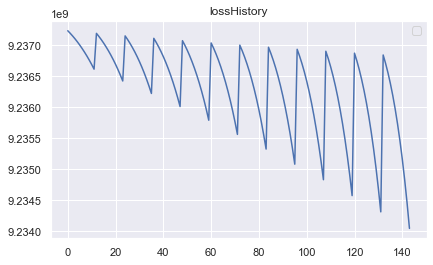

No handles with labels found to put in legend.


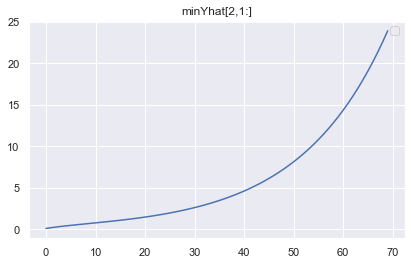

No handles with labels found to put in legend.


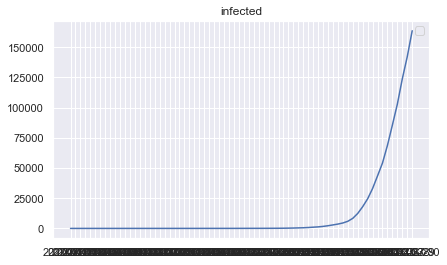

No handles with labels found to put in legend.


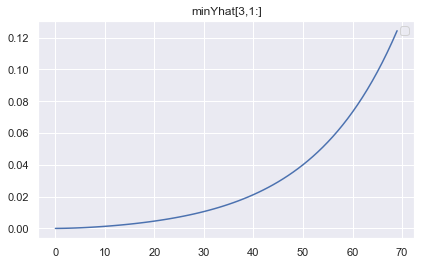

No handles with labels found to put in legend.


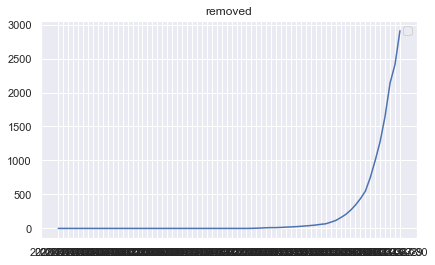

          Country                                             Params
0           India  [0.9499999999999998, 0.9499999999999998, 0.022...
1        Pakistan  [0.9499999999999998, 0.9499999999999998, 0.008...
2           Italy  [0.9499999999999998, 0.9499999999999998, 0.016...
3           Spain  [0.9499999999999998, 0.9499999999999998, 0.030...
4          France  [0.9499999999999998, 0.9499999999999998, 0.022...
5            Iran  [0.9499999999999998, 0.9499999999999998, 0.055...
6           China  [0.9499999999999998, 0.9499999999999998, 0.018...
7         Germany  [0.9499999999999998, 0.9499999999999998, 0.019...
8  United Kingdom  [0.9499999999999998, 0.9499999999999998, 0.020...
9              US  [0.9499999999999998, 0.9499999999999998, 0.003...


In [26]:
countries = list([countryToAnalyze, "Pakistan", "Italy", "Spain", "France", "Iran", "China", "Germany", "United Kingdom"])
# countries = list([countryToAnalyze, "Pakistan"])

from pandas import *
pyplot.figure(1)
paramsResultDf = DataFrame({'Country': [], 'Params': []})

#This is incomplete - WIP
for country in countries:
    print(country)
    N = int(populationDf [populationDf['Country']==country]['Population'])
#     print('Population of ', country, 'is :: ', N )
    confirmedTSDf = confirmedDf.loc[confirmedDf["Country/Region"] == country].sum().T[4:]
    recoveredTSDf = recoveredDf.loc[recoveredDf["Country/Region"] == country].sum().T[4:]
    deathsTSDf = deathsDf.loc[deathsDf["Country/Region"] == country].sum().T[4:]
#     removedArr = recoveredTSDf.values + deathsTSDf.values
    params = estimateParameters(confirmedTSDf, (recoveredTSDf+deathsTSDf), N)
    paramsResultDf = paramsResultDf.append({'Country': country , 'Params': params}, ignore_index=True)
N = int(populationDf [populationDf['Country']=='United States']['Population'])
params_us = estimateParameters(total_infected_us_timeseries, total_removed_us_timeseries, N)  
paramsResultDf = paramsResultDf.append({'Country': "US" , 'Params': params_us}, ignore_index=True)
print(paramsResultDf)
    